In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import DecisionTree as DT

# Part 1: Moons Dataset

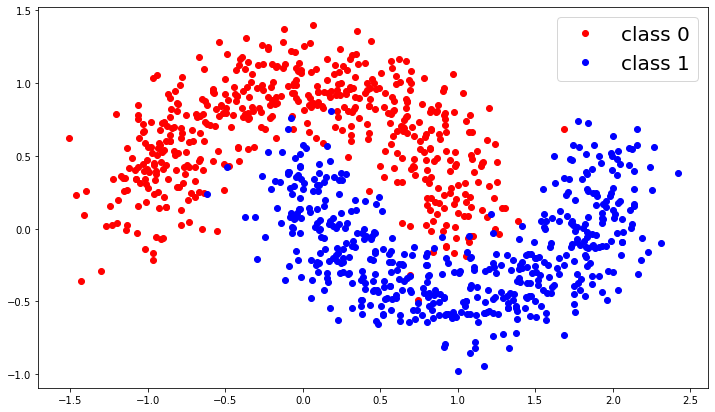

In [33]:
'generate two moon-shaped sets'
from sklearn.datasets import make_moons
X,labels = make_moons(n_samples=1000,noise=0.2)
plt.figure(figsize=(12,7))
colors = ['red','blue']
def pltOrig():    
    for i in range(2):
        plt.plot(X[labels==i,0],X[labels==i,1],'o',color=colors[i],label = 'class '+str(i))
    plt.legend(fontsize=20)
pltOrig()

1. Split the dataset into a training, a validation and a test sets

In [34]:
X_train, labels_train = X[:600],labels[:600]
X_val, labels_val = X[600:800],labels[600:800]
X_test, labels_test = X[800:],labels[800:]


2. Use the training set to train a Decision Tree. Use the validation set to find a good parameter (max_level) for the Decision Tree Classifier.

In [35]:
'train Decision Tree'

'Find Optimal max_level'

max_level_list = [level for level in range(20)] # [0,1,2,...]

p_incorrect = np.zeros(20)
for max_level in max_level_list:
    'train the model'
    Tree,label_Tree,feature_Tree = DT.decision_tree(X_train,labels_train,max_level=max_level)
    'Test the model on the validation set'
    labels_val_predicted = np.array([DT.tree_classifier(Tree,label_Tree,feature_Tree,X_val[i],max_level=max_level)
                                  for i in range(len(labels_val))])
    'Percentage of incorrect classifications'
    p_incorrect[max_level] = 100*sum(labels_val_predicted!=labels_val)/len(labels_val)
    


Text(0.5, 1.0, 'percentage of incorrect classifications')

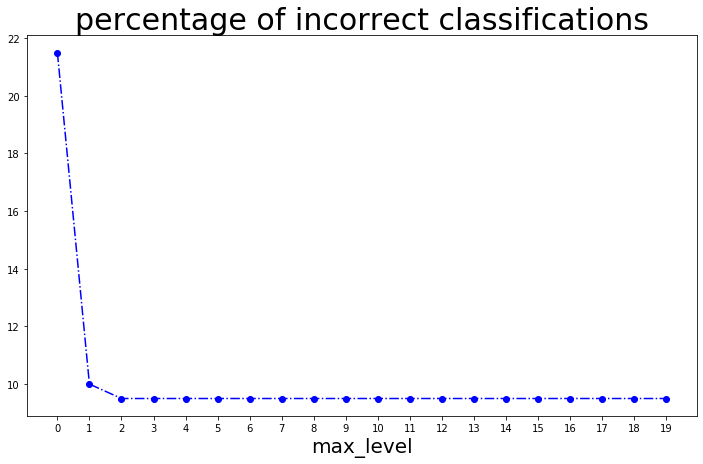

In [36]:
plt.figure(figsize=(12,7))
plt.plot(max_level_list,p_incorrect,'b-.o')
plt.xticks(max_level_list)
plt.xlabel('max_level',fontsize=20)
plt.title('percentage of incorrect classifications',fontsize=30)

In [41]:
max_level = 2

3. Measure your Decision Tree's performance on the test set. 

In [42]:
'Train Set'
Tree, label_Tree, feat_Tree = DT.decision_tree(X_train,labels_train,max_level = max_level)

'Test the model on test set'
labels_test_predicted = np.array([DT.tree_classifier(Tree,label_Tree,feat_Tree,X_test[i],max_level=max_level)
                                 for i in range (len(labels_test))])

In [43]:
'Confusion matrix'
C = np.zeros((2,2))
for i in range(2):
    for j in range(2):
        C[i,j] = sum(labels_test_predicted[labels_test==i]==j)
        
C

array([[82., 25.],
       [ 2., 91.]])

In [44]:
'Measure Correct Classifications'
100*sum(labels_val_predicted==labels_val)/len(labels_val)

90.5

4. Grow a Random Forest by following these steps:

    (a) Generate 1000 subsets of the training set, each containing 100 instances selected randomly.
    
    (b) Train one Decision Tree on each subset, using the best max_level value found in Question 2.

5. For each test set instance, generate the predictions of the 1000 Decision Trees, and keep only the most frequent    prediction.

# Part 2: the Zoo Dataset

The zoo dataset consists of 101 animals from a zoo.
There are 16 variables with various traits to describe the animals.
The 7 class types are: 

0 = Mammal

1 = Bird 

2 = Reptile 

3 = Fish

4 = Amphibian

5 = Bug

6 = Invertebrate

In [50]:
'load the data'
url = 'https://raw.githubusercontent.com/um-perez-alvaro/classification/master/zoo.csv'
zoo_data = pd.read_csv(url)
zoo_data.head(5)

,animal_name,hair,feathers,eggs,milk,airborne,aquatic,predator,toothed,backbone,breathes,venomous,fins,legs,tail,domestic,catsize,class_type
0,aardvark,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
1,antelope,1,0,0,1,0,0,0,1,1,1,0,0,4,1,0,1,1
2,bass,0,0,1,0,0,1,1,1,1,0,0,1,0,1,0,0,4
3,bear,1,0,0,1,0,0,1,1,1,1,0,0,4,0,0,1,1
4,boar,1,0,0,1,0,0,1,1,1,1,0,0,4,1,0,1,1


Train a Decision Tree (or a Random Forest) to predict the classification of the animals based upon the variables.

In [58]:
'split dataset'
features = ["hair","feathers","eggs","eggs","milk","airborne","aquatic","predator","toothed","backbone","breathes","venomous","fins","legs","tail","domestic","catsize","class_type",]
X = zoo_data[features]
labels = zoo_data["class_type"]

X_train,labels_train = X[:60],labels[:60]
X_val,labels_val = X[60:80],labels[60:80]
X_test,labels_test = X[80:],labels[80:]

X_train,labels_train = X_train.to_numpy(),labels_train.to_numpy()
X_val,labels_val = X_val.to_numpy(),labels_val.to_numpy()
X_test,labels_test = X_test.to_numpy(),labels_test.to_numpy()

labels_train

array([1, 1, 4, 1, 1, 1, 1, 4, 4, 1, 1, 2, 4, 7, 7, 7, 2, 1, 4, 1, 2, 2,
       1, 2, 6, 5, 5, 1, 1, 1, 6, 1, 1, 2, 4, 1, 1, 2, 4, 6, 6, 2, 6, 2,
       1, 1, 7, 1, 1, 1, 1, 6, 5, 7, 1, 1, 2, 2, 2, 2])

In [62]:
'Find Optimal max_level'
max_level_list = [level for level in range(20)] # [0,1,2,...]

p_incorrect = np.zeros(20)
for max_level in max_level_list:
    print(max_level)
    'train the model'
    Tree,label_Tree,feature_Tree = DT.decision_tree(X_train,labels_train,max_level=max_level)
    'Test the model on the validation set'
    labels_val_predicted = np.array([DT.tree_classifier(Tree,label_Tree,feature_Tree,X_val[i],max_level=max_level)
                                  for i in range(len(labels_val))])
    'Percentage of incorrect classifications'
    p_incorrect[max_level] = 100*sum(labels_val_predicted!=labels_val)/len(labels_val)
p_incorrect    

0
1
2
3
4
5
6
7
8
9
10
11
12
13
14
15
16
17
18
19


array([40., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20., 20.,
       20., 20., 20., 20., 20., 20., 20.])

Text(0.5, 1.0, 'percentage of incorrect classifications')

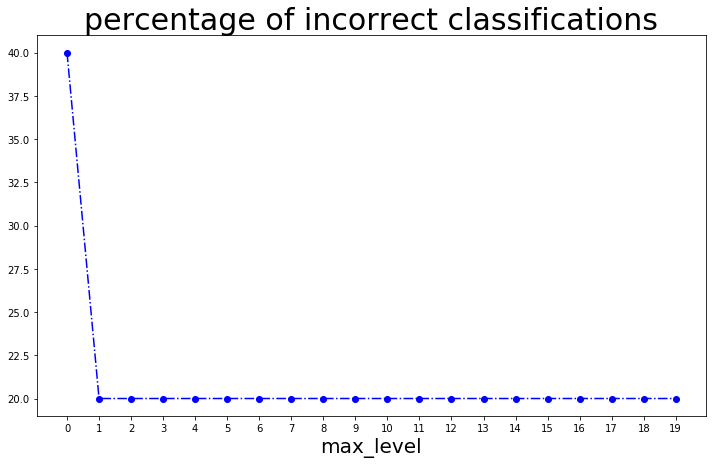

In [61]:
plt.figure(figsize=(12,7))
plt.plot(max_level_list,p_incorrect,'b-.o')
plt.xticks(max_level_list)
plt.xlabel('max_level',fontsize=20)
plt.title('percentage of incorrect classifications',fontsize=30)

In [54]:
best_level = 1
best_level

1

In [55]:
'Train the Decision Tree'
max_level = 1 # optimal max_level
Tree,label_Tree,feature_Tree = DT.decision_tree(X_train,labels_train,max_level=max_level)
'Test the model on the test set'
labels_test_predicted = np.array([DT.tree_classifier(Tree,label_Tree,feature_Tree,X_test[i],max_level=max_level)
                                  for i in range(len(labels_test))])

In [56]:
'Confusion matrix'
x = len(labels)
C = np.zeros((x,x))
for i in range(x):
    for j in range(x):
        C[i,j] = sum(labels_test_predicted[labels_test==i]==j)
C

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 5., 0., ..., 0., 0., 0.],
       [0., 0., 4., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]])

# Part 3: the King County Dataset 

The dataset kc_house_data contains house sale prices for King County, which includes Seattle.

In [63]:
'load the data'
url = 'https://raw.githubusercontent.com/um-perez-alvaro/lin-regress/master/kc_house_data.csv'
data = pd.read_csv(url)
data.head(5)

,id,date,price,bedrooms,bathrooms,sqft_living,sqft_lot,floors,waterfront,view,...,grade,sqft_above,sqft_basement,yr_built,yr_renovated,zipcode,lat,long,sqft_living15,sqft_lot15
0,7129300520,20141013T000000,221900.0,3,1.00,1180,5650,1.0,0,0,...,7,1180,0,1955,0,98178,47.5112,-122.257,1340,5650
1,6414100192,20141209T000000,538000.0,3,2.25,2570,7242,2.0,0,0,...,7,2170,400,1951,1991,98125,47.7210,-122.319,1690,7639
2,5631500400,20150225T000000,180000.0,2,1.00,770,10000,1.0,0,0,...,6,770,0,1933,0,98028,47.7379,-122.233,2720,8062
3,2487200875,20141209T000000,604000.0,4,3.00,1960,5000,1.0,0,0,...,7,1050,910,1965,0,98136,47.5208,-122.393,1360,5000
4,1954400510,20150218T000000,510000.0,3,2.00,1680,8080,1.0,0,0,...,8,1680,0,1987,0,98074,47.6168,-122.045,1800,7503


There are 21 attributes

In [64]:
data.columns

Index(['id', 'date', 'price', 'bedrooms', 'bathrooms', 'sqft_living',
       'sqft_lot', 'floors', 'waterfront', 'view', 'condition', 'grade',
       'sqft_above', 'sqft_basement', 'yr_built', 'yr_renovated', 'zipcode',
       'lat', 'long', 'sqft_living15', 'sqft_lot15'],
      dtype='object')

1. id: Unique ID for each home sold
2. data: Date of the home sale
3. price: Price of each home sold
4. bedrooms: Number of bedrooms
5. bathrooms: Number of bathrooms, where .5 accounts for a room with a toilet but no shower
6. sqft_living: Square footage of the apartments interior living space
7. sqft_lot: Square footage of the land space
8. floors: Number of floors
9. waterfront: A dummy variable for whether the apartment was overlooking the waterfront or not
10. view: An index from 0 to 4 of how good the view of the property was
11. condition: An index from 1 to 5 on the condition of the apartment
12. grade: An index from 1 to 13, where 1-3 falls short of building construction and design, 7 has an average level of construction and design, and 11-13 have a high quality level of construction and design
13. sqft_above: The square footage of the interior housing space hat is above ground level
14. sqft_basement: The square footage of the interior housing space that is below ground level
15. yr_built: The year the house was initially built
16. yr_renovated: The year of the house's last renovation
17. zipcode: What zipcode area the house is in
18. lat: Latitude
19. long: Longitude
20. sqft_living15: The square footage of interior housing living space for the nearest 15 neighbors
21. sqft_lot15: The square footage of the land lots of the nearest 15 neighbors.

The goal is to train a Decision Tree (or a Random Forest) to predict house prices.

Split the dataset into a training, a validation, and a test sets

   (a) Use the training set to train the model.
    
   (b) Use the validation set to find the best parameters of the model.
    
   (c) Measure the performance of your model on the test set.  What MSE did you get?